# Mitsiu Alejandro Carreño Sarabia - E23S-18014

# Introducción

El objetivo de este notebook es entrenar una red neuronal que pueda determinar una imágen de número manuscrito entre 0 y 9.
Las caracteristicas de las imágenes es que deben de ser de 8x8 pixeles (64 en total). Dónde cada pixel tiene un valor entre 0 y 16 (escala de grises).

Finalmente una vez obtenido el modelo de predicción se evaluará el rendimiento del clasificador mediante un analisis del área bajo la curva y las curvas ROC multiclase.

## Carga de datos

In [1]:
from sklearn.datasets import load_digits

import numpy as np
import pandas as pd

In [2]:
data = load_digits()

print(data.DESCR)
print(data.feature_names)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [3]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=["Type"])

In [4]:
X.tail()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,8.0,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0


In [5]:
y.tail()

,Type
1792,9
1793,0
1794,8
1795,9
1796,8


## Estandarización

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=117)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Implementar modelo

In [8]:
from tensorflow import keras

2024-03-24 05:05:05.474658: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-24 05:05:05.538431: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model = keras.Sequential([
    keras.layers.Input(shape=(64,)),
    #keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(12, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])



2024-03-24 05:05:07.434612: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: UNKNOWN ERROR (34)


In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=117)


## Entrenamiento
Se aplicaron pocas epocas para disminuir la precisión del modelo

In [11]:
model.fit(X_train, y_train, epochs=2, validation_data=(X_val, y_val))

Epoch 1/2
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1039 - loss: 2.6096 - val_accuracy: 0.1667 - val_loss: 2.3683
Epoch 2/2
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2460 - loss: 2.0862 - val_accuracy: 0.3160 - val_loss: 1.9579


## Evaluación de modelo

In [12]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Perdida test: {test_loss:.4f}")
print(f"Precision test: {test_accuracy * 100 :.2f}%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3589 - loss: 1.8285  
Perdida test: 1.8492
Precision test: 34.72%


In [13]:
y_pred = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


## ROC

Las curvas ROC usualmente se componen de evaluar los verdaderos positivos (eje Y) contra 1 - los falsos positivos (eje X) siendo la esquina superior izq el punto ideal.
Tamién es posible calcular el área bajo la curva la cuál entre más se acerque a 1 es mejor.

## One vs rest

Las curvas ROC usualmente se aplican a clasificaciones binarias, en los que los verdaderos positivos y falsos positivos son obvios. Cuando se trata de una categorización multiclase la noción de veraderos positivos y falsos positivos se logra a traves de **binarizar los resultados**, esto se puede llevar a cabo de dos maneras.

- One vs Rest en el que se compara cada clase contra todas las demás (que se asumen como una sola)
- One vs One en el que se compara cada una de las combinaciones posibles de clases.

Durante este analisis únicamente se evaluó mediante el esquema One vs Rest en el que la clase en cuestion se interpreta como la clase positiva y el resto como la clase negativa

## One-hot-encode OvR fashion

In [14]:
from sklearn.preprocessing import LabelBinarizer

In [15]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

In [16]:
print(y_onehot_test.shape)
print(y_onehot_test[:10])

(360, 10)
[[0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


In [17]:
for i in range(10):
    print(f"{i} == {label_binarizer.transform([i])}")

0 == [[1 0 0 0 0 0 0 0 0 0]]
1 == [[0 1 0 0 0 0 0 0 0 0]]
2 == [[0 0 1 0 0 0 0 0 0 0]]
3 == [[0 0 0 1 0 0 0 0 0 0]]
4 == [[0 0 0 0 1 0 0 0 0 0]]
5 == [[0 0 0 0 0 1 0 0 0 0]]
6 == [[0 0 0 0 0 0 1 0 0 0]]
7 == [[0 0 0 0 0 0 0 1 0 0]]
8 == [[0 0 0 0 0 0 0 0 1 0]]
9 == [[0 0 0 0 0 0 0 0 0 1]]


In [18]:
for i in range(10):
    class_id = np.flatnonzero(label_binarizer.classes_ == i)[0]
    print(f"{i} == {class_id}")

0 == 0
1 == 1
2 == 2
3 == 3
4 == 4
5 == 5
6 == 6
7 == 7
8 == 8
9 == 9


Nos damos cuenta que dada la naturaleza númerica de las clases **el onehot encoding genera exactamente los mismos resultados** que tomar la clase de manera directa, pero el procedimiento anterior es útil cuando tenemos categorías nominales.

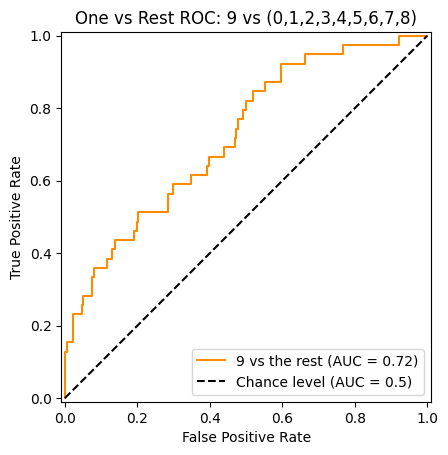

In [19]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_pred[:, i],
    name=f"{i} vs the rest",
    color="darkorange",
    plot_chance_level=True
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One vs Rest ROC: 9 vs (0,1,2,3,4,5,6,7,8)"
)

## ROC con micro-promedio OvR
El micropromedio toma en cuenta las contribuciones de todas las clases.
Es recomendable con clasificaciones muy imbalanceadas.

Para el micro-promedio se aplica el método ravel de numpy mediante el cuál se suman los true positive, false positive, true negative y true positive de cada una de las clases.

Ejemplo
y_pred = [
    [1,2,3,4],
    [3,4,6,7]
]
y_pred.ravel() == [1,2,3,4, 3,4,6,7]


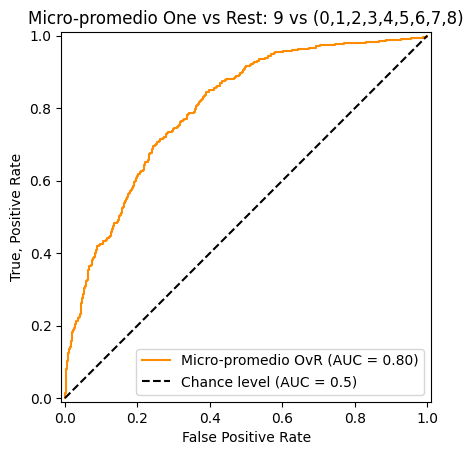

In [20]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_pred.ravel(),
    name="Micro-promedio OvR",
    color="darkorange",
    plot_chance_level=True
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True, Positive Rate",
    title="Micro-promedio One vs Rest: 9 vs (0,1,2,3,4,5,6,7,8)"
)

Podemos notar que por tomar los promedios de cada categoría la curva se suaviza.

## Calculando el micro-promedio de todas las categorías
Podemos observar que para obtener el micro-promedio es muy **similar a obtener el roc_curve simple (una clasificación binaria) con la función roc_curve(y_real, y_pred)**

También es posible obtener el valor del área con la función roc_auc_score en donde **se especifica el average micro y multi_class ovr**

In [21]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, roc_auc = dict(), dict(), dict()

# Micro-promedio
fpr["micro"], tpr["micro"], micro_thresholds = roc_curve(y_onehot_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-promedio One vs Rest ROC AUC: {roc_auc['micro']}")

#===================
from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_pred,
    multi_class="ovr",
    average="micro"
)
print(f"Micro-promedio función: {micro_roc_auc_ovr}")

Micro-promedio One vs Rest ROC AUC: 0.7989463305898491
Micro-promedio función: 0.7989463305898491


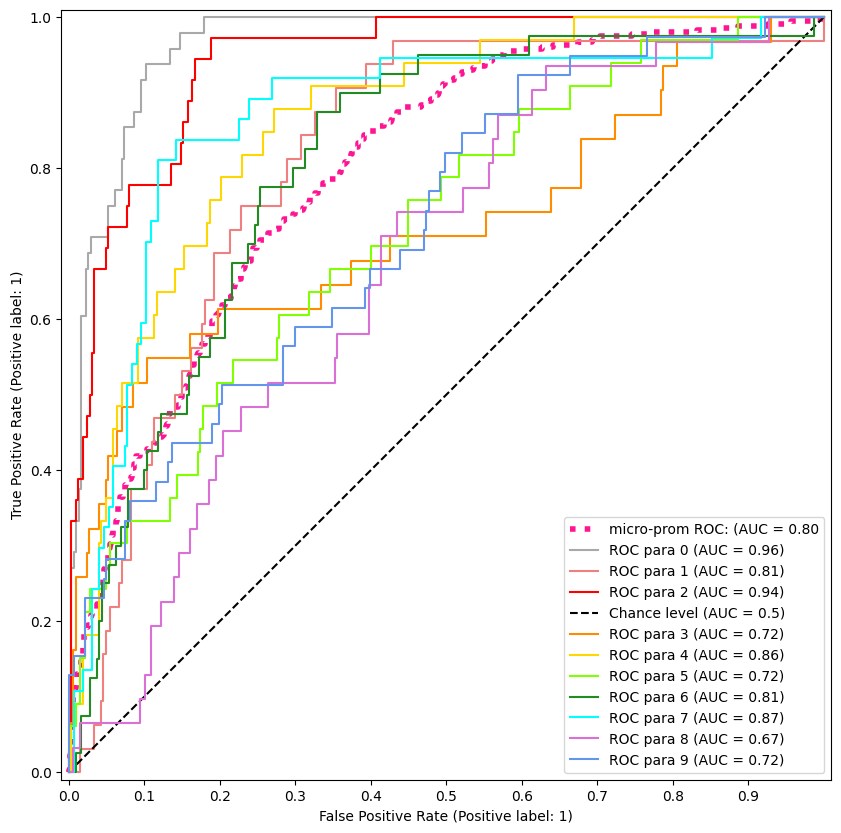

In [22]:
fig, ax = plt.subplots(figsize=(10,10))

plt.xticks(np.arange(0, 1, 0.1))
# Dibujar el roc micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-prom ROC: (AUC = {roc_auc['micro']:.2f}",
    color="deeppink",
    linestyle=":",
    linewidth=4
)

colors = ["darkgray", 
          "lightcoral", 
          "red",
          "darkorange",
          "gold",
          "chartreuse",
          "forestgreen",
          "aqua", 
          "orchid",
          "cornflowerblue"]

# Dibujar cada una de las categorías
for i in range(10):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, i],
        y_pred[:, i],
        name=f"ROC para {i}",
        color=colors[i],
        ax = ax,
        plot_chance_level=(i == 2)
    )


## ROC con macro-promedio OvR

In [23]:

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Start, end, num of elements
fpr_grid = np.linspace(0.0, 1.0, 1000)
#print(fpr_grid)

# Interpolar todas las curvas ROC en nuestro espacio
mean_tpr = np.zeros_like(fpr_grid)

for i in range(10):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i]) # interpolación lineal
    # Curve fitting using linear polynomials to construct new data points 
    # within the range of a discrete set of known data points

mean_tpr /= 10

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-promedio OvR ROC AUC: {roc_auc['macro']}")

#===========================================
macro_roc_auc_ovr = roc_auc_score(
    y_test,
    y_pred,
    multi_class="ovr",
    average="macro"
)
print(f"Macro-promedio función: {macro_roc_auc_ovr}")

Macro-promedio OvR ROC AUC: 0.808517605465743
Macro-promedio función: 0.8085802768768053


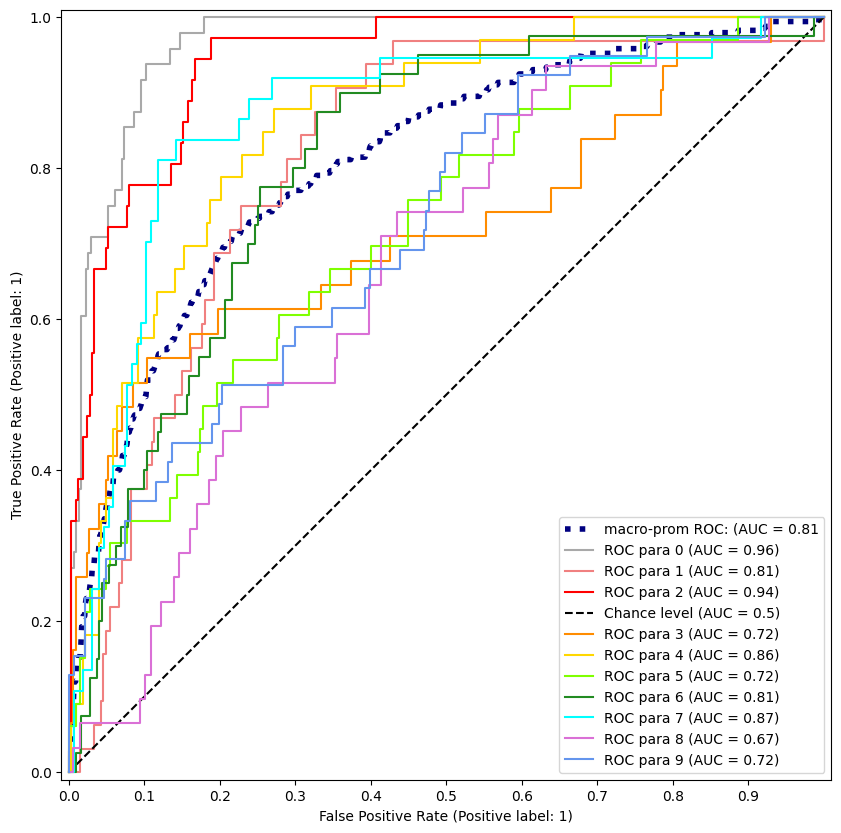

In [24]:
fig, ax = plt.subplots(figsize=(10,10))

plt.xticks(np.arange(0, 1, 0.1))
plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-prom ROC: (AUC = {roc_auc['macro']:.2f}",
    color="navy",
    linestyle=":",
    linewidth=4
)

colors = ["darkgray", 
          "lightcoral", 
          "red",
          "darkorange",
          "gold",
          "chartreuse",
          "forestgreen",
          "aqua", 
          "orchid",
          "cornflowerblue"]

for i in range(10):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, i],
        y_pred[:, i],
        name=f"ROC para {i}",
        color=colors[i],
        ax = ax,
        plot_chance_level=(i == 2)
    )

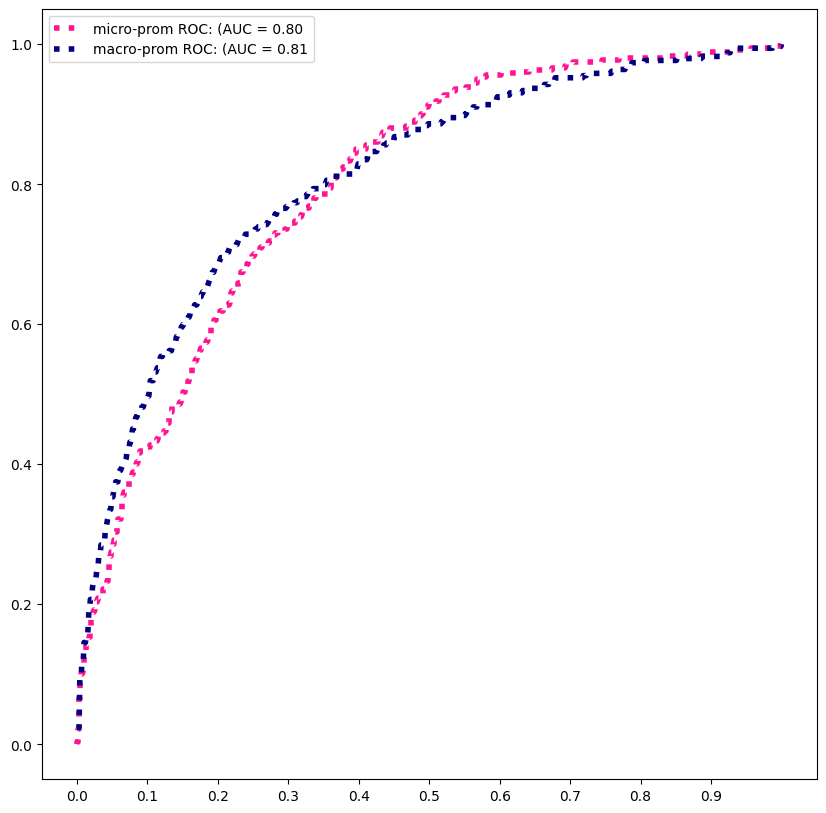

In [25]:
fig, ax = plt.subplots(figsize=(10,10))

plt.xticks(np.arange(0, 1, 0.1))
# Dibujar el roc micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-prom ROC: (AUC = {roc_auc['micro']:.2f}",
    color="deeppink",
    linestyle=":",
    linewidth=4
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-prom ROC: (AUC = {roc_auc['macro']:.2f}",
    color="navy",
    linestyle=":",
    linewidth=4
)

plt.legend(loc="best")
plt.show()

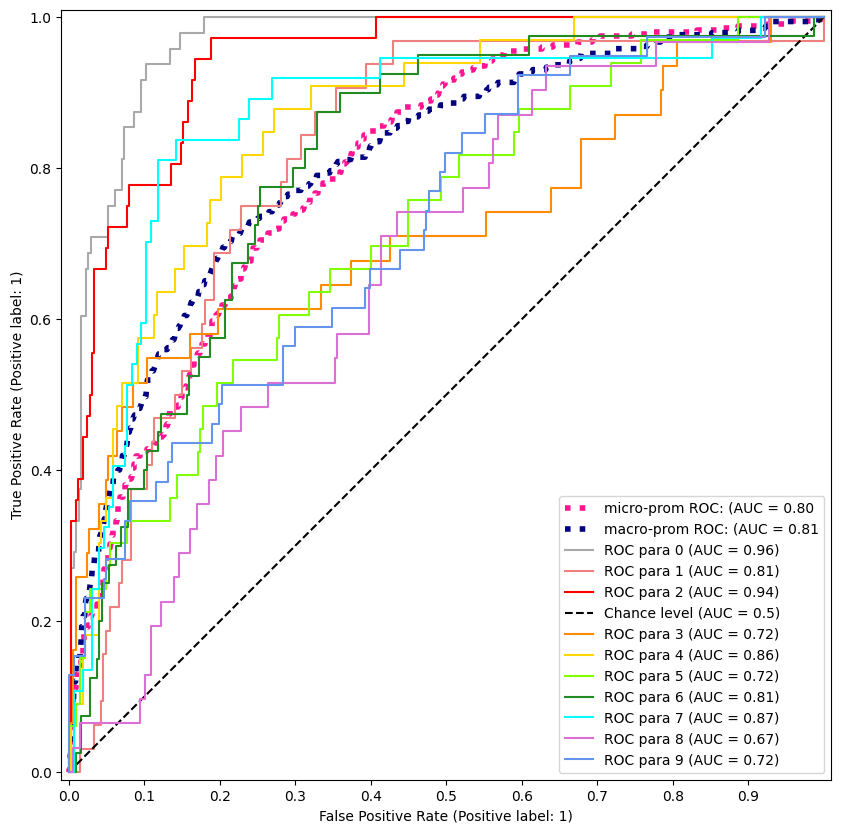

In [26]:
fig, ax = plt.subplots(figsize=(10,10))


plt.xticks(np.arange(0, 1, 0.1))
# Dibujar el roc micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-prom ROC: (AUC = {roc_auc['micro']:.2f}",
    color="deeppink",
    linestyle=":",
    linewidth=4
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-prom ROC: (AUC = {roc_auc['macro']:.2f}",
    color="navy",
    linestyle=":",
    linewidth=4
)


colors = ["darkgray", 
          "lightcoral", 
          "red",
          "darkorange",
          "gold",
          "chartreuse",
          "forestgreen",
          "aqua", 
          "orchid",
          "cornflowerblue"]

# Dibujar cada una de las categorías
for i in range(10):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, i],
        y_pred[:, i],
        name=f"ROC para {i}",
        color=colors[i],
        ax = ax,
        plot_chance_level=(i == 2)
    )


Conclusiones:
Después de haber "empeorado" la red es mucho más sencillo notar cuales es la categoría que peor evalua, y también se puede comparar con las otras cateogorías. Como interpretación personal puedo asumir que el dígito 8, así como el 9  son los peores clasificados dada su cercanía geometríca con el 0 (el mejor evaluado). (Los digitos cambiaron un poco al volver a ejecutar el notebook al agregar el punto óptimo de corte)

Creo que las funciones ROC multiclase es una herramienta poderosa que nos permite evaluar de manera aisalada el desempeño de nuestros modelos de clasificación.

## Calcular punto óptimo de corte

In [27]:
# Basado en indice de Youden
# tomando los true positive rate y false positive rate
youden = tpr["micro"] - fpr["micro"]
# Al ser un problema de optimización en la que queremos máximizar el true positive rate y minimizar el false positive rate
youden_argmax = np.argmax(youden)
# Buscamos en los thresholds que nos regresa ROC 
cut_off = micro_thresholds[youden_argmax]

print(f"Punto de corte óptimo : {cut_off:.3f}")

Punto de corte óptimo : 0.092


In [28]:
print(micro_thresholds[np.argmax(tpr["micro"] - fpr["micro"])])

0.09171039


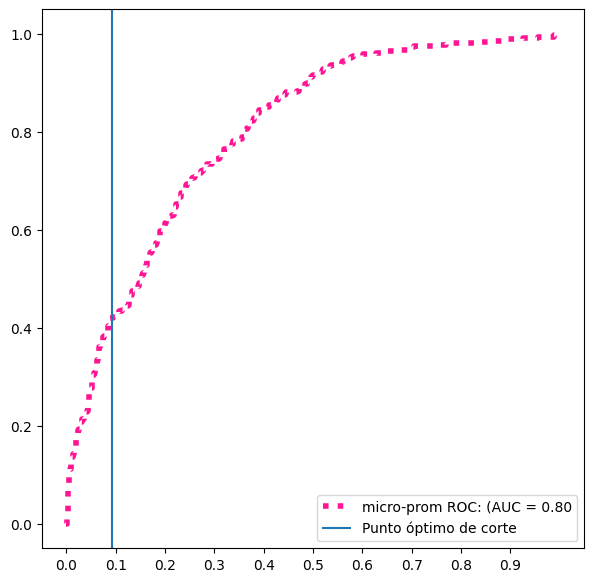

In [29]:

fig, ax = plt.subplots(figsize=(7,7))

plt.xticks(np.arange(0, 1, 0.1))
# Dibujar el roc micro
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-prom ROC: (AUC = {roc_auc['micro']:.2f}",
    color="deeppink",
    linestyle=":",
    linewidth=4
)



plt.axvline(x=cut_off, label="Punto óptimo de corte")

plt.legend(loc="best")
plt.show()